In [2404]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2405]:
data=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2406]:
data.shape

(13320, 9)

There are around 13k rows and 9 columns.

In [2407]:
print(data.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [2408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [2409]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


**Numerical Columns**

In [2410]:
for column in data.columns:
    if data[column].dtype!='O':
        print(column)

bath
balcony
price


**Categorical columns**

In [2411]:
for column in data.columns:
    if data[column].dtype=='O':
        print(column)

area_type
availability
location
size
society
total_sqft


In [2412]:
data.drop(['availability','society'],axis=1,inplace=True)

**Checking for Missing Values**

In [2413]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

There are missing values in location size society bath and balcony we need to handle them

**Data preprocessing**

In [2414]:
data.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [2415]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [2416]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [2417]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [2418]:
data['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [2419]:
data['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

Since 1 Bedroom and 1 BHK both are same we will have a single value.

In [2420]:
data['size']=data['size'].replace({'1 Bedroom': '1 BHK',
                                   '2 Bedroom': '2 BHK',
                                  '3 Bedroom':'3 BHK','4 Bedroom':'4 BHK',
                                   '5 Bedroom':'5 BHK','6 Bedroom':'6 BHK',
                                   '7 Bedroom':'7 BHK','8 Bedroom':'8 BHK',
                                   '9 Bedroom':'9 BHK','10 Bedroom':'10 BHK'
                                  })

**Data Visualisation**

In [2421]:
data.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [2422]:
import matplotlib.pyplot as plt
import seaborn as sns

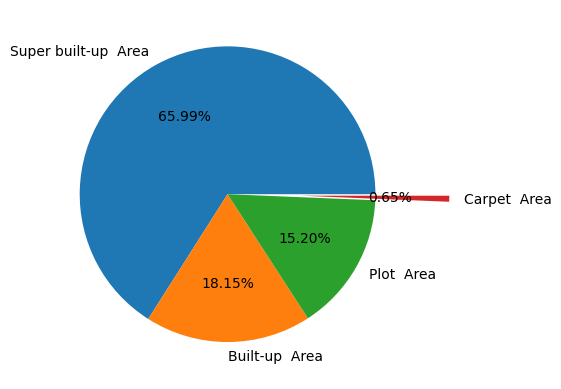

<Axes: xlabel='area_type', ylabel='count'>

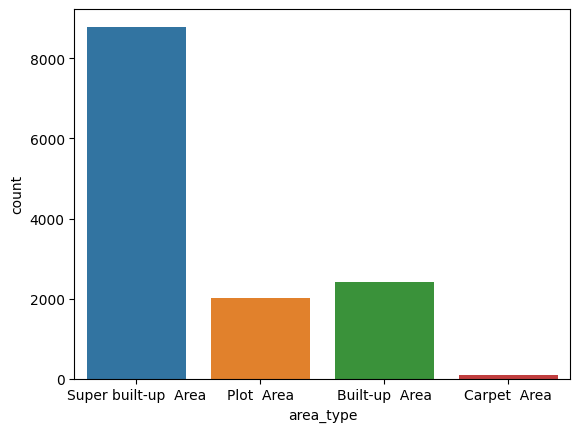

In [2423]:

plt.pie(data['area_type'].value_counts(),autopct='%0.2f%%',labels=['Super built-up  Area','Built-up  Area','Plot  Area','Carpet  Area'],explode=[0,0,0,0.5])
plt.show()

sns.countplot(data,x='area_type')


From the above visualisation it is evident that approximately 65% are super built-up area.

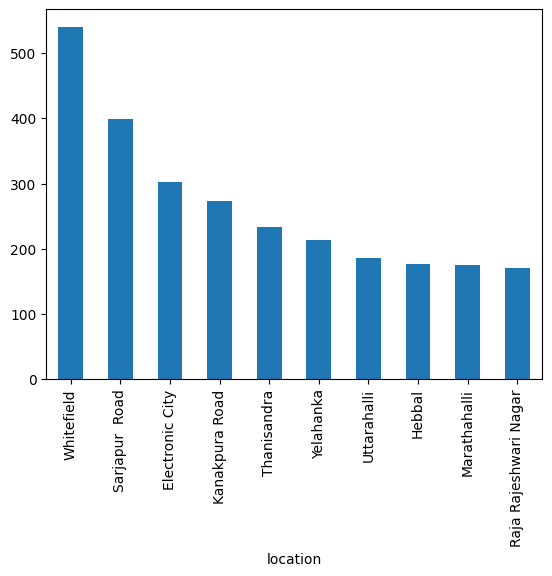

In [2424]:
top_10_location=data['location'].value_counts().sort_values(ascending=False)[0:10].plot(kind='bar')

These are the top 10 areas in Bengaluru with most number of houses. 

<Axes: xlabel='size'>

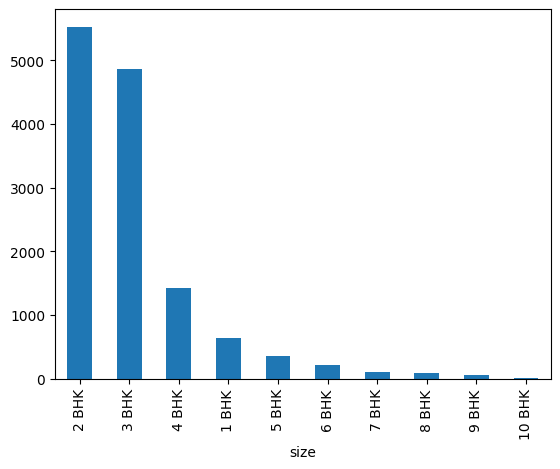

In [2425]:
data['size'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

There are more than 5000 houses of 2 BHK and around 5000 houses are  3 BHK 

<Axes: xlabel='balcony', ylabel='count'>

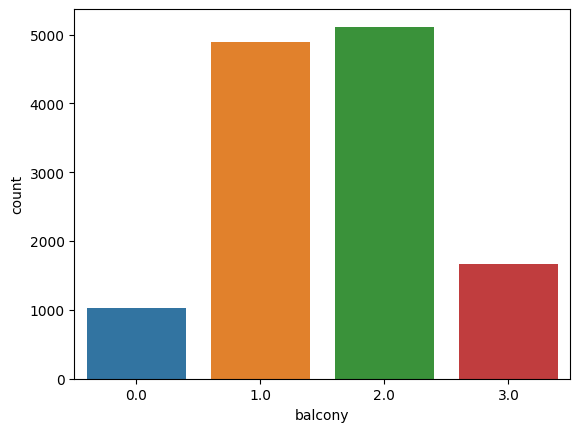

In [2426]:
sns.countplot(data=data,x='balcony')

Most of the houses have around 1 to 2 balconies

<Axes: xlabel='bath'>

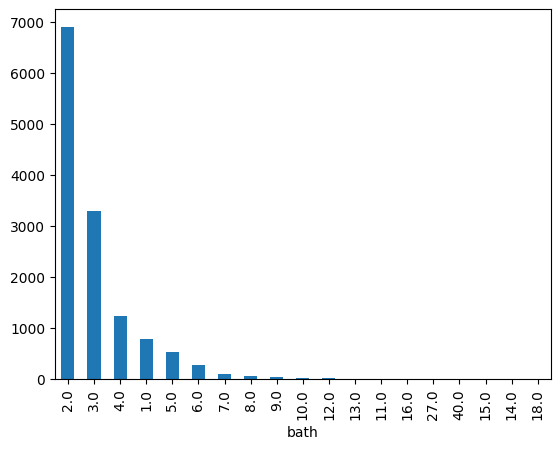

In [2427]:
data['bath'].value_counts().sort_values(ascending=False).plot(kind='bar')

Maximum number of houses have 2 to  3 bathrooms.


<Axes: xlabel='price', ylabel='Count'>

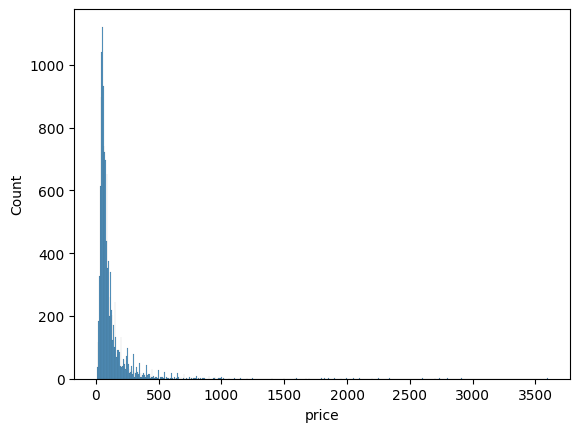

In [2428]:
sns.histplot(data=data,x='price')

**Bivariate Analysis**

Columns
*******
area_type availability location  size society total_sqft bath balcony price

<Axes: xlabel='area_type', ylabel='price'>

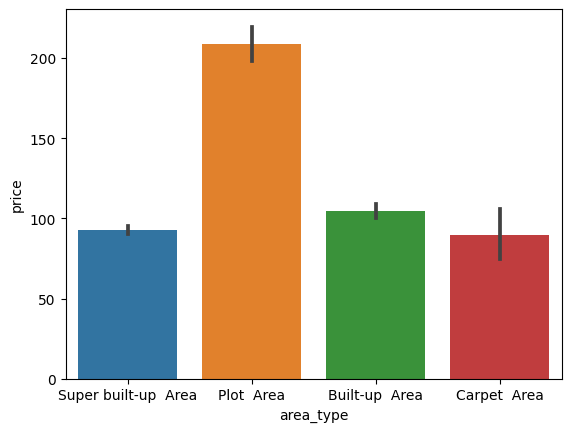

In [2429]:
sns.barplot(data,x='area_type',y='price')

SO In Bengaluru plot area are costlier compared to other.

<Axes: xlabel='size', ylabel='price'>

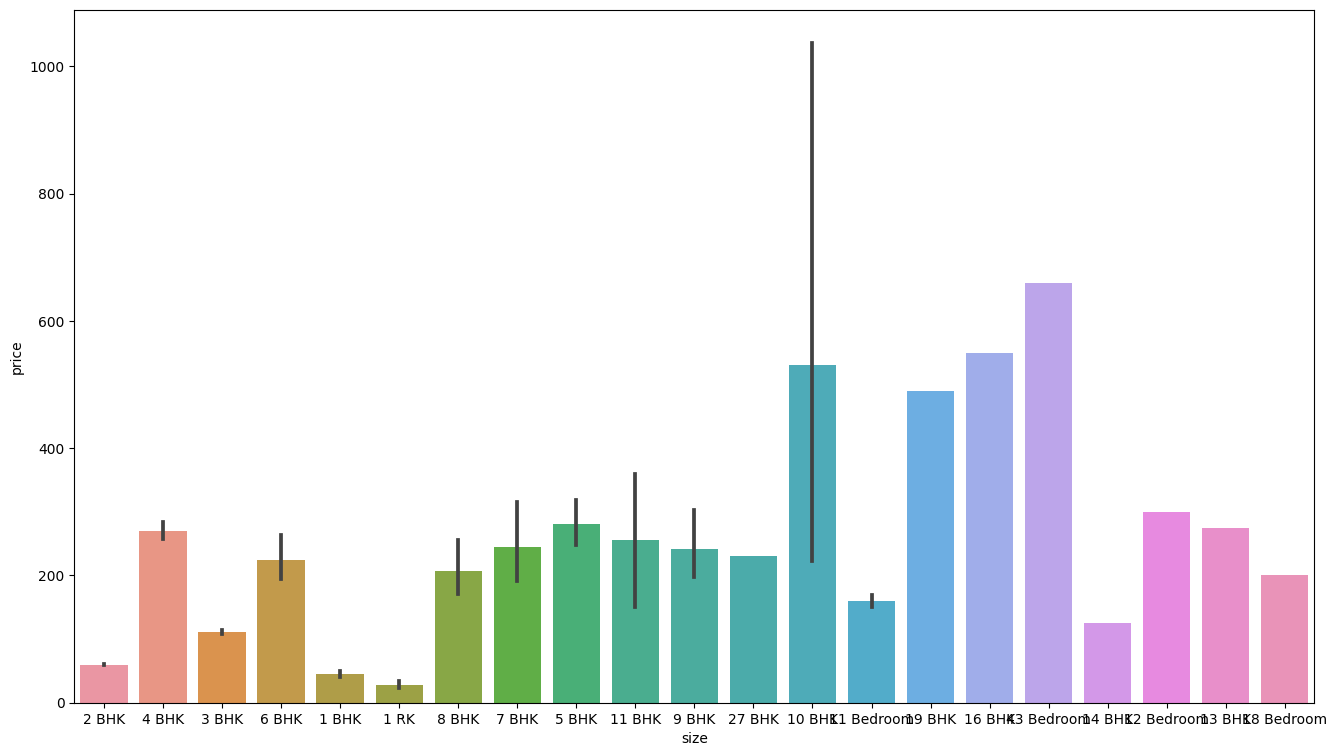

In [2430]:
plt.figure(figsize=(16,9))
sns.barplot(data,x='size',y='price')

So as we can see that as the number of bedrooms increases price of the house also increases.

<Axes: xlabel='bath', ylabel='price'>

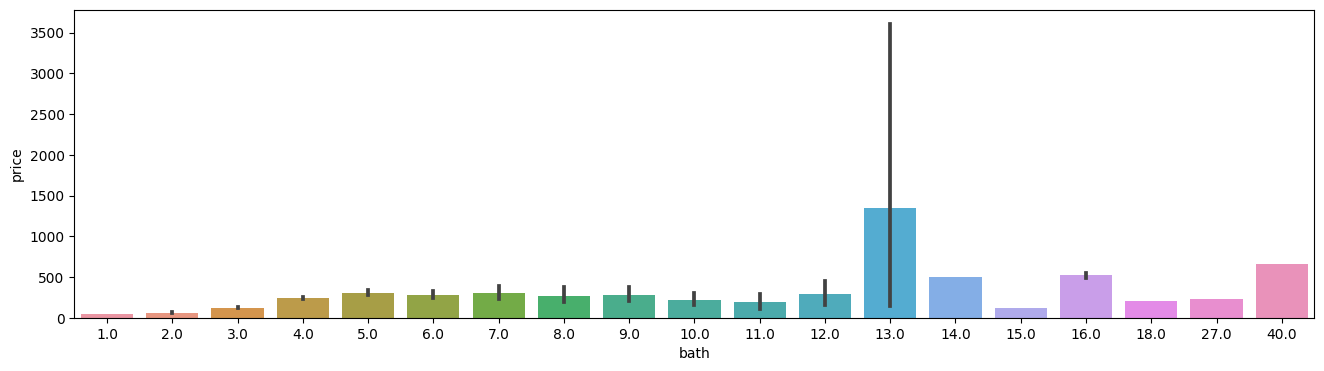

In [2431]:
#area_type availability location size society total_sqft bath balcony price
plt.figure(figsize=(16,4))
sns.barplot(x='bath',data=data,y='price')

As the number of bathroom increases price of the house also increases

<Axes: xlabel='balcony', ylabel='price'>

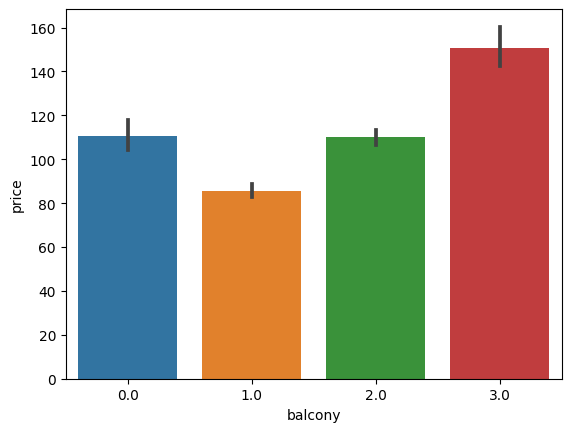

In [2432]:
sns.barplot(x='balcony',data=data,y='price')

House with balocny has more price

<Axes: xlabel='balcony', ylabel='price'>

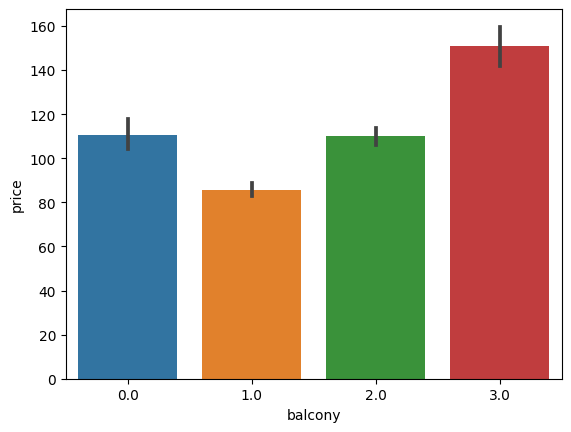

In [2433]:
sns.barplot(x='balcony',data=data,y='price')

<Axes: xlabel='balcony', ylabel='price'>

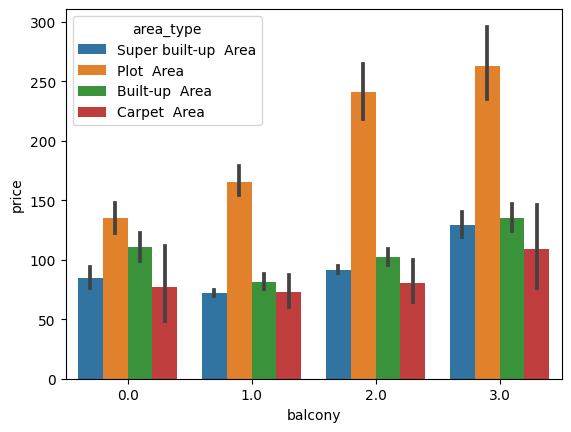

In [2434]:
sns.barplot(x='balcony',data=data,y='price',hue='area_type')

In [2435]:
def preprocess_total_sqft(val):
    try:
        return float(val)
    except:
        if('-' in val):
            values=val.split('-')
            #Taking average sqft value.
            val=float(values[0])+float(values[1])/2
            
data['total_sqft']=data['total_sqft'].apply(preprocess_total_sqft)
print(type(data['total_sqft'][0]))
    

<class 'numpy.float64'>


**Handling Missing values**

In [2436]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft    247
bath           73
balcony       609
price           0
dtype: int64

In [2437]:
data['location'].dropna(inplace=True)

In [2438]:
##Simialarly We will fill the NaN value in size column with most most repeated size of house
common_house_size=data['size'].value_counts().sort_values(ascending=False).index[0]
data['size'].fillna(common_house_size,inplace=True)

In [2439]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [2440]:
data.fillna(data['bath'].mode()[0],inplace=True)

In [2441]:
## Encoding total SQFT value
data['total_sqft'].median()


1260.0

In [2442]:
data[['balcony','price']].corr()
#Since the correlation is too low will drop this column
data.drop('balcony',axis=1,inplace=True)

In [2443]:
data.shape

(13320, 6)

<Axes: xlabel='price', ylabel='Count'>

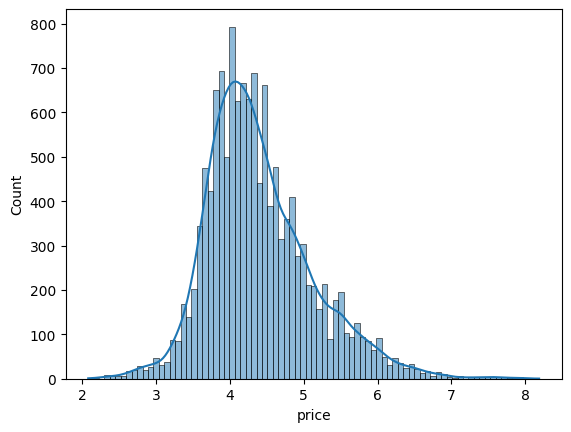

In [2444]:
from scipy import stats
sns.histplot(np.log(data['price']),kde=True)

<Axes: ylabel='Count'>

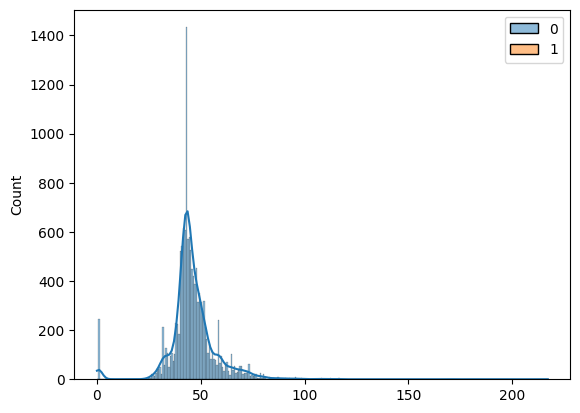

In [2445]:
sns.histplot(stats.boxcox(data['total_sqft']),kde=True)

In [2446]:
data['price']=np.log(data['price'])
data['total_sqft']=stats.boxcox(data['total_sqft'])[0]

In [2447]:
#For Total Sqft we encode median values
data['total_sqft'].fillna(data['total_sqft'].median())

0        41.001971
1        60.708196
2        46.971156
3        48.106544
4        43.369443
           ...    
13315    68.603444
13316    69.843961
13317    42.420690
13318    78.227991
13319    30.697930
Name: total_sqft, Length: 13320, dtype: float64

In [2448]:
#Outlier removal for price column
IQR=data['price'].quantile(0.75)-data['price'].quantile(0.25)
upper_fence=data['price'].quantile(0.75)+1.5*IQR
lower_fence=data['price'].quantile(0.25)-1.5*IQR
data=data[data['price']<=upper_fence]
data=data[data['price']>=lower_fence]

In [2449]:
#Outlier removal for total sqft column
IQR=data['total_sqft'].quantile(0.75)-data['total_sqft'].quantile(0.25)
upper_fence=data['total_sqft'].quantile(0.75)+1.5*IQR
lower_fence=data['total_sqft'].quantile(0.25)-1.5*IQR
data=data[data['total_sqft']<=upper_fence]
data=data[data['total_sqft']>=lower_fence]

In [2450]:
area_type=pd.get_dummies(data['area_type'],drop_first=True,dtype='int')
data=pd.concat([data,area_type],axis=1)

In [2451]:
data.drop('area_type',axis=1,inplace=True)

In [2452]:
data['size']=data['size'].apply(lambda x : int(x.split(' ')[0]) )

In [2453]:
data['location'].value_counts()

location
Whitefield                            432
Sarjapur  Road                        338
Electronic City                       295
Kanakpura Road                        257
Thanisandra                           214
                                     ... 
GB Palya                                1
Kengeri Satellite Town ( BDA SITE)      1
Brigade Road                            1
Maruthi HBCS Layout                     1
Abshot Layout                           1
Name: count, Length: 1201, dtype: int64

In [2454]:
location_with_less_than_10_values=data['location'].value_counts()
location_with_less_than_10_values=location_with_less_than_10_values[location_with_less_than_10_values<=10]

In [2455]:
data['location']=data['location'].apply(lambda x : x if x not in location_with_less_than_10_values else 'others')

In [2456]:
location=pd.get_dummies(data['location'],drop_first=True,dtype='int')
data=pd.concat([data,location],axis=1)
data.drop('location',inplace=True,axis=1)

In [2457]:
X=data.drop('price',axis=1)
Y=data['price']

In [2458]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [2459]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [2460]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [2461]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7171251076217979

In [2462]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [2463]:
Y_pred_dt=dt.predict(X_test)

In [2464]:
r2_score(Y_pred_dt,Y_test)

0.603397516120201

In [2465]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [2466]:
Y_pred_knn=knn.predict(X_test)

In [2467]:
r2_score(Y_pred_knn,Y_test)

0.5525652035727259

In [2468]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [2469]:
Y_pred_rf=rf.predict(X_test)
r2_score(Y_pred_rf,Y_test)

0.6592459194525231